In [ ]:
# Steps in Data Preprocessing

# 1. Data Collection: Gathering raw data from various sources.
# Task 1: Collect data from two different sources and merge them.
# Task 2: Validate the integrity of the collected datasets.
# Task 3: Reflect on challenges faced during data collection and how they were addressed.




In [1]:
import pandas as pd

# Source 1: CSV or API simulation
data1 = {
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
}
df1 = pd.DataFrame(data1)

# Source 2: Another CSV or database export
data2 = {
    'ID': [1, 2, 4],
    'City': ['New York', 'Los Angeles', 'Chicago'],
    'Income': [70000, 80000, 65000]
}
df2 = pd.DataFrame(data2)

# Merge the two sources on 'ID'
merged_df = pd.merge(df1, df2, on='ID', how='outer')

print(merged_df)


   ID     Name   Age         City   Income
0   1    Alice  25.0     New York  70000.0
1   2      Bob  30.0  Los Angeles  80000.0
2   3  Charlie  35.0          NaN      NaN
3   4      NaN   NaN      Chicago  65000.0


In [2]:
# Check for missing values
print("Missing values:\n", merged_df.isnull().sum())

# Check data types
print("\nData types:\n", merged_df.dtypes)

# Validate primary key uniqueness
assert merged_df['ID'].is_unique, "Duplicate IDs found!"


Missing values:
 ID        0
Name      1
Age       1
City      1
Income    1
dtype: int64

Data types:
 ID          int64
Name       object
Age       float64
City       object
Income    float64
dtype: object


In [ ]:
# 2. Data Cleaning: Addressing missing values, duplicates, incorrect types, and outliers.
# Task 1: Clean a given dataset and document the changes made.
# Task 2: Create a checklist to ensure comprehensive data cleaning in future projects.
# Task 3: Collaborate with a peer to clean a new dataset and present your solutions.



In [3]:
import pandas as pd
import numpy as np

# Sample raw data with issues
data = {
    'ID': [1, 2, 2, 4, 5, 6],
    'Age': ['25', '30', '30', 'NaN', 45, 'fifty'],
    'Score': [85, 90, 90, 300, 88, 92],
    'City': ['New York', 'Los Angeles', 'Los Angeles', 'Chicago', None, 'Miami']
}

df = pd.DataFrame(data)

# Documented cleaning steps:

# 1. Remove duplicate rows based on all columns
df = df.drop_duplicates()

# 2. Handle missing values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert 'Age' to numeric, coercing errors to NaN
df['Age'].fillna(df['Age'].mean(), inplace=True)       # Replace NaN in 'Age' with mean

df['City'].fillna('Unknown', inplace=True)             # Fill missing 'City' with 'Unknown'

# 3. Remove outliers in 'Score' using IQR
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Score'] >= lower_bound) & (df['Score'] <= upper_bound)]

print("Cleaned Dataset:")
print(df)


Cleaned Dataset:
   ID        Age  Score         City
0   1  25.000000     85     New York
1   2  30.000000     90  Los Angeles
4   5  45.000000     88      Unknown
5   6  33.333333     92        Miami


In [ ]:
# 3. Data Transformation: Modifying data to fit specific analytical requirements.
# Task 1: Transform a date column into separate 'day', 'month', and 'year' columns.
# Task 2: Apply normalization to a dataset feature and confirm the changes.
# Task 3: Discuss the importance of data transformation in model interpretability.




In [4]:
import pandas as pd

# Sample dataset with date column
data = {
    'ID': [1, 2, 3],
    'Date': ['2025-05-20', '2025-06-15', '2025-07-10']
}

df = pd.DataFrame(data)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract day, month, year into new columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

print(df)


   ID       Date  Day  Month  Year
0   1 2025-05-20   20      5  2025
1   2 2025-06-15   15      6  2025
2   3 2025-07-10   10      7  2025


In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Sample dataset
data = {
    'ID': [1, 2, 3, 4, 5],
    'Score': [50, 60, 70, 80, 90]
}
df = pd.DataFrame(data)

# Initialize scaler
scaler = MinMaxScaler()

# Normalize 'Score' column
df['Score_Normalized'] = scaler.fit_transform(df[['Score']])

print(df)


   ID  Score  Score_Normalized
0   1     50              0.00
1   2     60              0.25
2   3     70              0.50
3   4     80              0.75
4   5     90              1.00


In [ ]:
# 4. Feature Scaling: Adjusting data features to a common scale.
# Task 1: Apply Min-Max scaling to a dataset.
# Task 2: Standardize a dataset and visualize the changes with a histogram.
# Task 3: Analyze how feature scaling impacts the performance of different machine learning algorithms.





In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample dataset
data = {
    'Height_cm': [150, 160, 170, 180, 190],
    'Weight_kg': [50, 60, 70, 80, 90]
}
df = pd.DataFrame(data)

scaler = MinMaxScaler()

# Apply Min-Max scaling to the dataset
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Original Data:\n", df)
print("\nMin-Max Scaled Data:\n", df_scaled)


Original Data:
    Height_cm  Weight_kg
0        150         50
1        160         60
2        170         70
3        180         80
4        190         90

Min-Max Scaled Data:
    Height_cm  Weight_kg
0       0.00       0.00
1       0.25       0.25
2       0.50       0.50
3       0.75       0.75
4       1.00       1.00


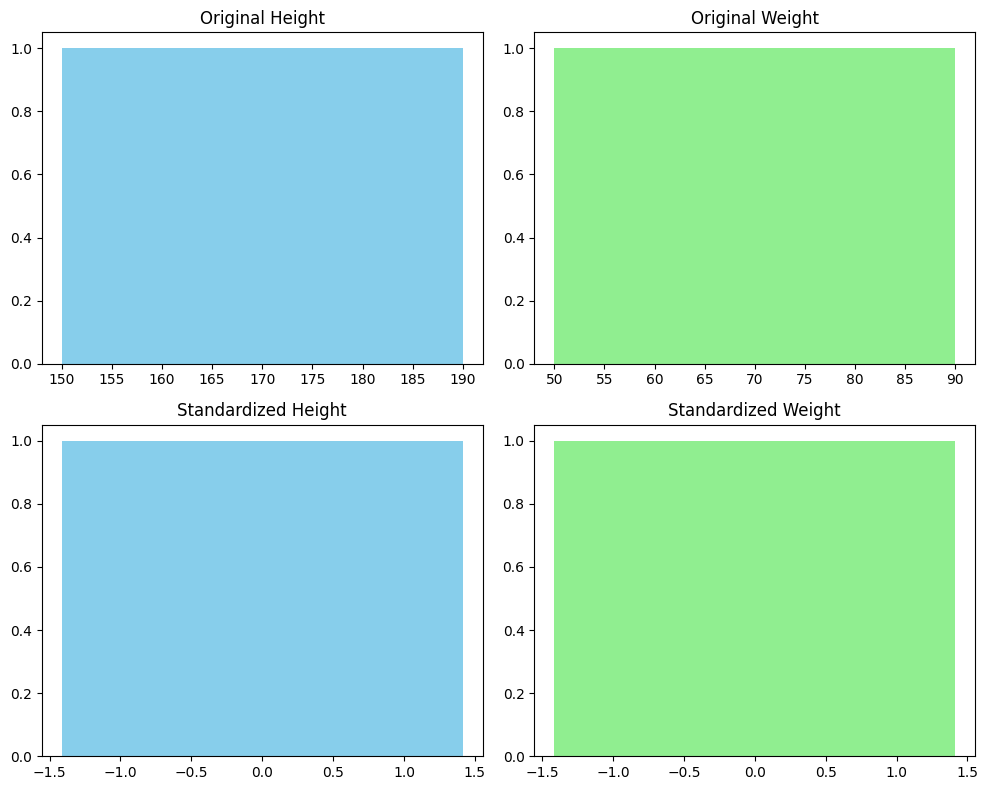

In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standardize the data
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Plot histograms before and after standardization
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Original data histograms
axes[0, 0].hist(df['Height_cm'], bins=5, color='skyblue')
axes[0, 0].set_title('Original Height')

axes[0, 1].hist(df['Weight_kg'], bins=5, color='lightgreen')
axes[0, 1].set_title('Original Weight')

# Standardized data histograms
axes[1, 0].hist(df_standardized['Height_cm'], bins=5, color='skyblue')
axes[1, 0].set_title('Standardized Height')

axes[1, 1].hist(df_standardized['Weight_kg'], bins=5, color='lightgreen')
axes[1, 1].set_title('Standardized Weight')

plt.tight_layout()
plt.show()


In [ ]:
# 5. Feature Engineering: Creating new features from existing ones to improve model accuracy.
# Task 1: Create a new synthetic feature from existing dataset features.
# Task 2: Evaluate the impact of new features on model accuracy.
# Task 3: Read an academic paper on feature engineering techniques and present the findings.




In [8]:
import pandas as pd

# Sample dataset
data = {
    'Age': [25, 30, 35, 40, 45],
    'Income': [50000, 60000, 65000, 70000, 72000]
}
df = pd.DataFrame(data)

# Create synthetic feature: Income per Age
df['Income_per_Age'] = df['Income'] / df['Age']

print(df)


   Age  Income  Income_per_Age
0   25   50000     2000.000000
1   30   60000     2000.000000
2   35   65000     1857.142857
3   40   70000     1750.000000
4   45   72000     1600.000000


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_original = df[['Age', 'Income']]
X_new = df[['Age', 'Income', 'Income_per_Age']]
y = [200, 250, 300, 350, 400]  # Target variable

# Split data
X_train_o, X_test_o, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)
X_train_n, X_test_n, _, _ = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Model without synthetic feature
model_o = LinearRegression()
model_o.fit(X_train_o, y_train)
y_pred_o = model_o.predict(X_test_o)
mse_o = mean_squared_error(y_test, y_pred_o)

# Model with synthetic feature
model_n = LinearRegression()
model_n.fit(X_train_n, y_train)
y_pred_n = model_n.predict(X_test_n)
mse_n = mean_squared_error(y_test, y_pred_n)

print(f'MSE without synthetic feature: {mse_o:.4f}')
print(f'MSE with synthetic feature: {mse_n:.4f}')


MSE without synthetic feature: 0.0000
MSE with synthetic feature: 99.8434
